In [1]:
#导入各种依赖包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
#加载数据集
iris=datasets.load_iris()

In [3]:
#数据集包含的所有字段
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
#各特征字段
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
#pandas加载数据
X=pd.DataFrame(iris.data,columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
#展示数据描述性的统计信息
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#查看数据条目数，多少行多少列
X.shape

(150, 4)

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
#数据标签字段转化为DataFrame
Y=pd.DataFrame(iris.target,columns=['target'])
Y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [10]:
#数据集拆分，分为训练集和测试集
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=12)

In [11]:
print("len(Xtrain):",len(Xtrain))
print("len(Ytrain):",len(Ytrain))
print("len(Xtest):",len(Xtest))
print("len(Ytest):",len(Ytest))

len(Xtrain): 120
len(Ytrain): 120
len(Xtest): 30
len(Ytest): 30


In [12]:
Xtrain

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
17,5.1,3.5,1.4,0.3
81,5.5,2.4,3.7,1.0
103,6.3,2.9,5.6,1.8
33,5.5,4.2,1.4,0.2
101,5.8,2.7,5.1,1.9
...,...,...,...,...
76,6.8,2.8,4.8,1.4
3,4.6,3.1,1.5,0.2
130,7.4,2.8,6.1,1.9
134,6.1,2.6,5.6,1.4


In [13]:
#重设索引
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.reset_index(drop=True,inplace=True)

In [14]:
Xtrain

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.3
1,5.5,2.4,3.7,1.0
2,6.3,2.9,5.6,1.8
3,5.5,4.2,1.4,0.2
4,5.8,2.7,5.1,1.9
...,...,...,...,...
115,6.8,2.8,4.8,1.4
116,4.6,3.1,1.5,0.2
117,7.4,2.8,6.1,1.9
118,6.1,2.6,5.6,1.4


In [15]:
#创建模型并训练
tree_clf=DecisionTreeClassifier(criterion='entropy')
tree_clf=tree_clf.fit(Xtrain,Ytrain)

In [16]:
#训练集准确率
train_score=tree_clf.score(Xtrain,Ytrain)
train_score

1.0

In [17]:
#测试集准确率
test_score=tree_clf.score(Xtest,Ytest)
test_score

0.9666666666666667

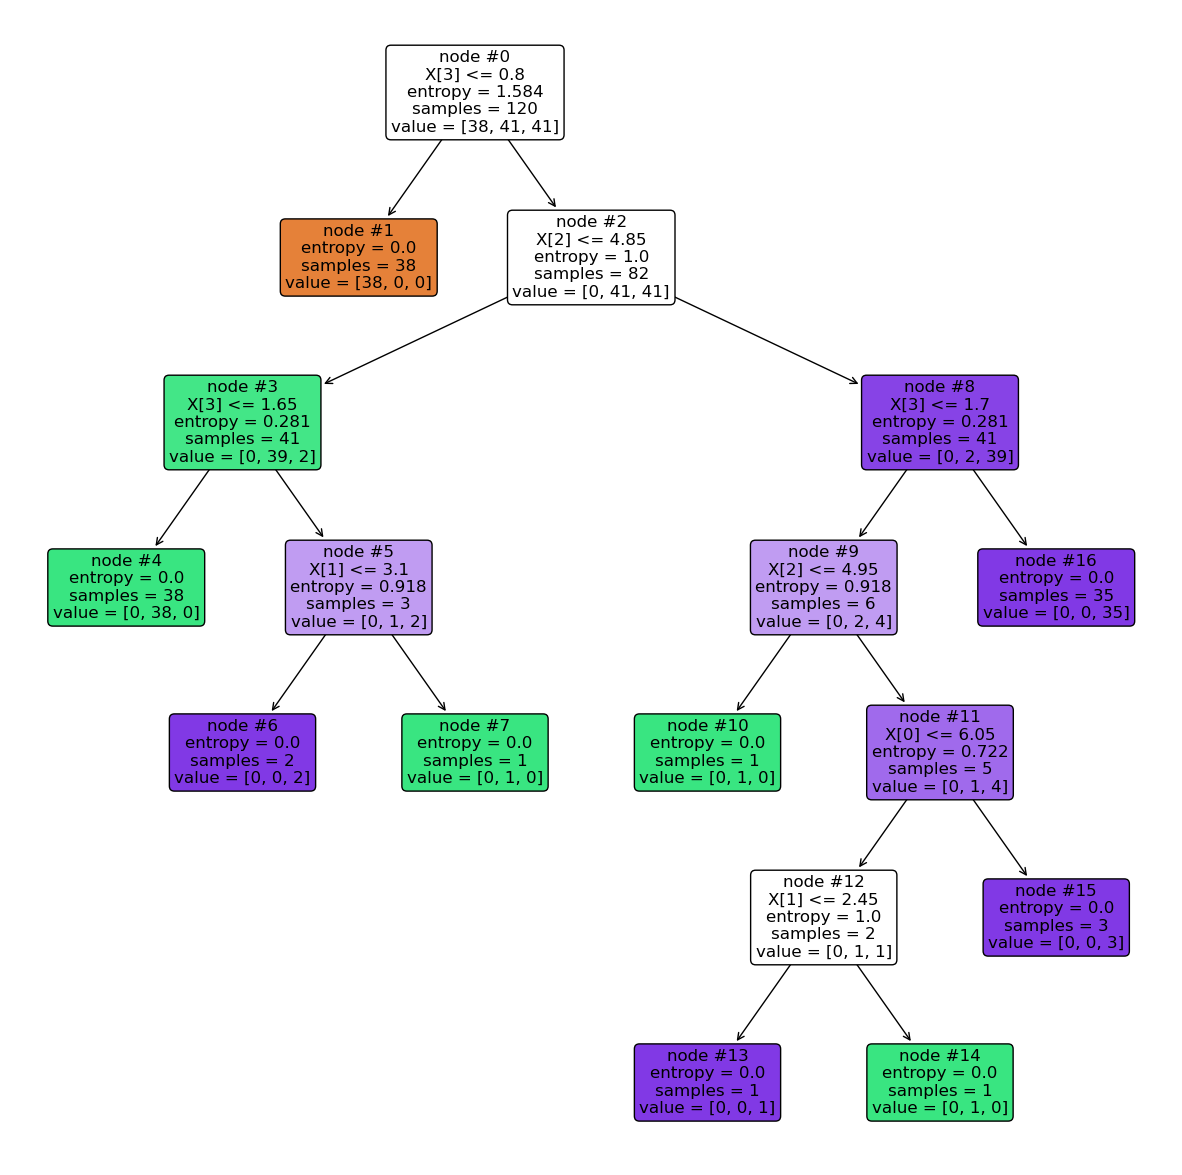

In [18]:
#对决策树进行美化并保存决策树图片到本地
plt.figure(figsize=(15,15)) #设置画布大小（单位为英寸）
tree.plot_tree(tree_clf,    #训练好的决策数评估器
               node_ids=True,   #显示节点id
               filled=True,     #给节点填充颜色
               rounded=True,    #节点方框变成圆角
               fontsize=12)     #节点中文本的字体大小

plt.savefig("iris数据集决策树.png") #保存照片一定要在ply.show()之前
plt.show()


In [19]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
Y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [21]:
#两个DataFrame按列合并
df_iris=pd.concat([X,Y],axis=1)

In [22]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

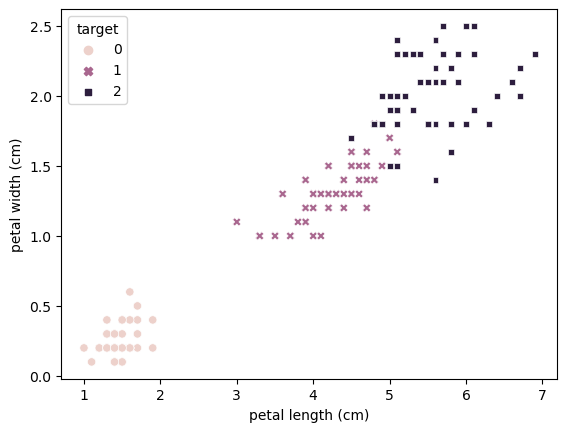

In [24]:
#seaborn库进行可视化
import seaborn as sns
#x轴设置为花萼长度，y轴设置为花瓣长度，按照不同的target赋予不同的点型和颜色
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='target', style='target', data=df_iris)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

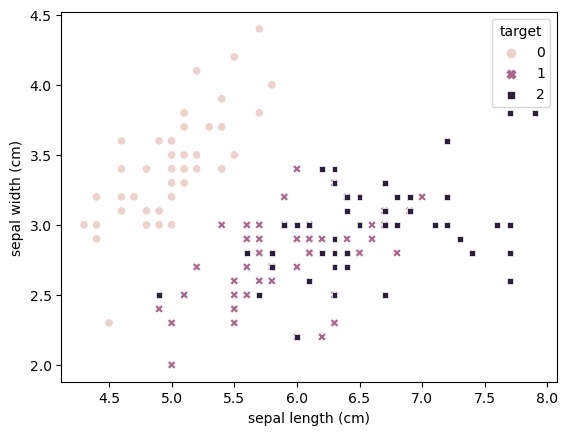

In [25]:
#x轴设置为花萼长度，y轴设置为花瓣长度，按照不同的target赋予不同的点型和颜色
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target', style='target', data=df_iris)

In [26]:
tree_clf.tree_.compute_feature_importances(normalize=False)

array([0.01341367, 0.03962406, 0.50701869, 1.02399659])

In [27]:
tree_clf.feature_importances_

array([0.00846794, 0.02501435, 0.32007685, 0.64644086])

In [28]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [29]:
#重要性
features_import=pd.DataFrame(X.columns,columns=['feature'])
features_import['importance']=tree_clf.feature_importances_ #特征重要性
features_import.sort_values('importance',inplace=True)

0.008467942997214355 sepal length (cm)
0.02501435380504767 sepal width (cm)
0.32007684673232917 petal length (cm)
0.6464408564654087 petal width (cm)


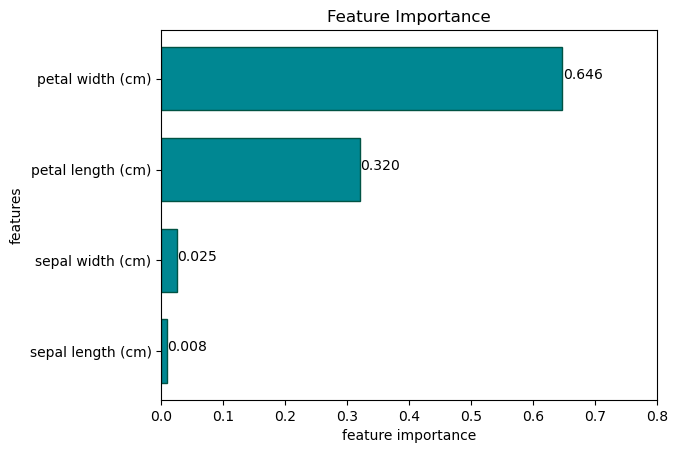

In [31]:
#绘画
plt.barh(features_import['feature'],
         features_import['importance'],
         height=0.7,
         color='#008792',
         edgecolor='#005344') 
plt.xlabel('feature importance')    #x轴
plt.ylabel('features')   #y轴
plt.xlim(0.0,0.8)
plt.title('Feature Importance') #标题
for a,b in zip(features_import['importance'],features_import['feature']):
    print(a,b)
    plt.text(a+0.001,b,'%.3f'%float(a)) #a+0.001代表标签位置在柱形图上方0.001处
plt.show()